IMPORTAMOS LAS LIBRERIAS NECESARIAS PARA EL ANALISIS TECNICO

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

IMPORTAMOS LA BASE DE DATOS  

In [78]:
df = pd.read_excel('/content/s vs p lista para imputar.xlsx')

In [79]:
df.head()

,Edad,Genero,Tipo_Trabajo,Hora_Diaria_En_Redes,Red_Social_Favorita,Notificaciones_Diarias,Horas_Diarias_Trabajadas,Puntuacion_Productividad_Autoevaluada,Puntuacion_Productividad_Real,Nivel_Estres,Horas_De_Sueño,Uso_Antes_De_Dormir,Breaks_En_El_Trabajo,Uso_De_Apps_De_Enfoque,Estado_De_BienestarDigital_Activo,Tazas_De_Cafe_Por_Dia,Dias_Del_Mes_Con_Burnout,Horas_Semanales_Fuera_De_Linea,Puntuacion_De_Satisfaccion_Laboral
0,56,Male,Unemployed,4.18,Facebook,61,6.75,8.04,7.29,4.0,5.12,0.42,8,False,False,4,11,21.93,6.34
1,46,Male,Health,3.25,Twitter,59,9.17,5.06,5.17,7.0,5.10,0.67,7,True,True,2,25,0.00,3.41
2,32,Male,Finance,NaN,Twitter,57,7.91,3.86,3.47,4.0,8.58,0.62,0,True,False,3,17,10.32,2.47
3,60,Female,Unemployed,NaN,Facebook,59,6.36,2.92,1.77,6.0,6.05,1.20,1,False,False,0,4,23.88,1.73
4,25,Male,IT,NaN,Telegram,66,6.21,8.87,NaN,7.0,5.41,1.88,1,False,True,1,30,10.65,9.69


**REVISAMOS LOS TIPOS EN LA BASE DE DATOS Y REGISTROS TOTALES POR COLUMNA **

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Edad                                   30000 non-null  int64  
 1   Genero                                 30000 non-null  object 
 2   Tipo_Trabajo                           30000 non-null  object 
 3   Hora_Diaria_En_Redes                   27235 non-null  float64
 4   Red_Social_Favorita                    30000 non-null  object 
 5   Notificaciones_Diarias                 30000 non-null  int64  
 6   Horas_Diarias_Trabajadas               30000 non-null  float64
 7   Puntuacion_Productividad_Autoevaluada  28386 non-null  float64
 8   Puntuacion_Productividad_Real          27635 non-null  float64
 9   Nivel_Estres                           28096 non-null  float64
 10  Horas_De_Sueño                         27402 non-null  float64
 11  Us

CANTIDAD DE DATOS FALTANTES

In [81]:
faltantes = df.isnull().sum()

print(faltantes)

Edad                                        0
Genero                                      0
Tipo_Trabajo                                0
Hora_Diaria_En_Redes                     2765
Red_Social_Favorita                         0
Notificaciones_Diarias                      0
Horas_Diarias_Trabajadas                    0
Puntuacion_Productividad_Autoevaluada    1614
Puntuacion_Productividad_Real            2365
Nivel_Estres                             1904
Horas_De_Sueño                           2598
Uso_Antes_De_Dormir                      2211
Breaks_En_El_Trabajo                        0
Uso_De_Apps_De_Enfoque                      0
Estado_De_BienestarDigital_Activo           0
Tazas_De_Cafe_Por_Dia                       0
Dias_Del_Mes_Con_Burnout                    0
Horas_Semanales_Fuera_De_Linea              0
Puntuacion_De_Satisfaccion_Laboral       2730
dtype: int64


TOTAL DE DATOS FALTANTES

In [82]:
faltantes = sum(df.isnull().sum())

print(faltantes)

16187


MATRIZ QUE NOS MUESTRA LA CORRELACION ENTRE LAS COLUMNAS MEDIANTE UN MAPA DE CALOR

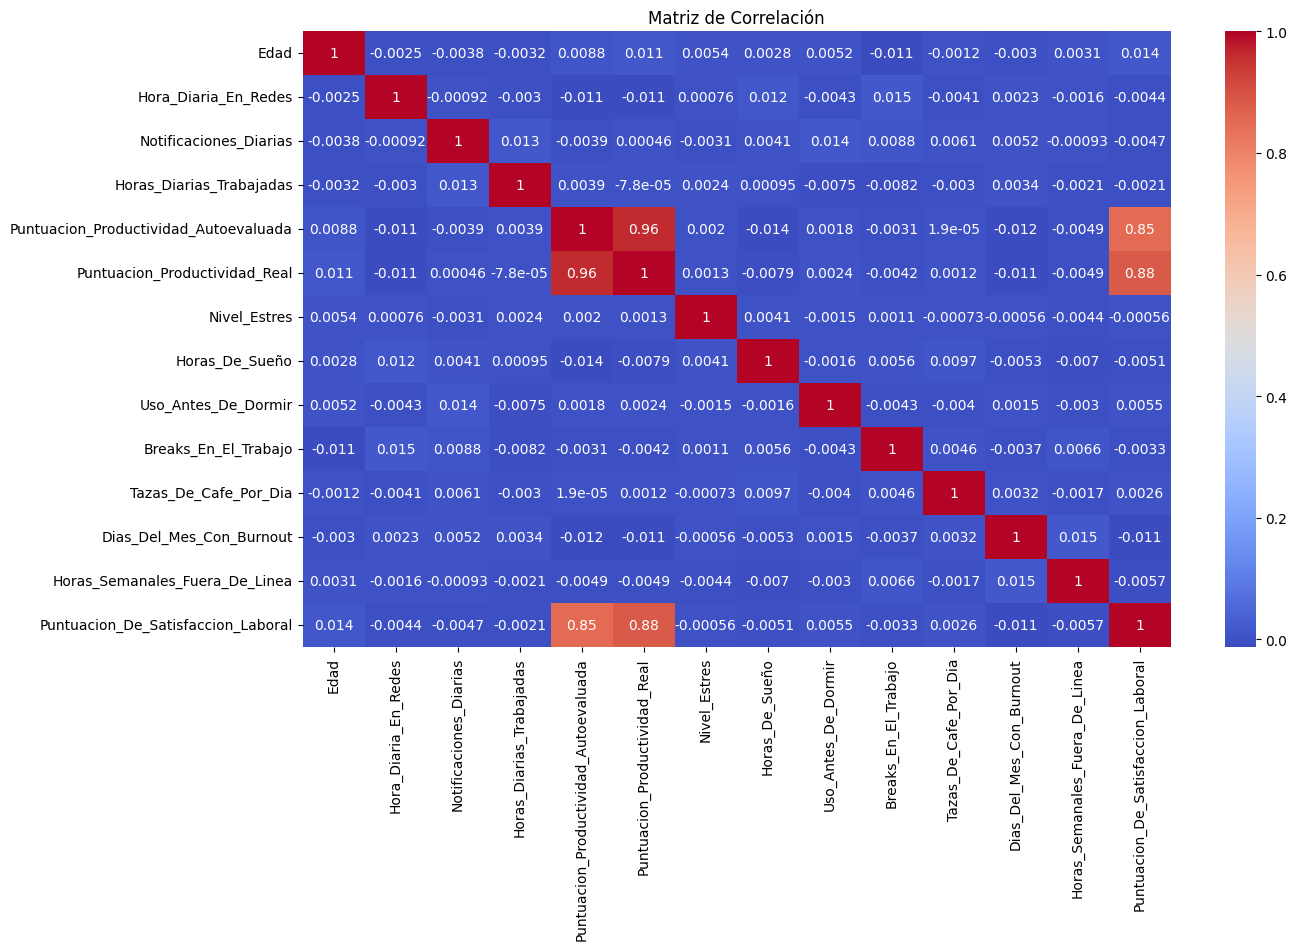

In [83]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(14,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

**DEBIDO A LA INTERPRETACIÓN DEL GRAFICO SE LLEGO A LA CONSLUSIÓN QUE LA MAYORIA DE DATOS FALTANTES ERAN MCAR, COSA FACILITO LA IMPUTACIÓN POR PROMEDIO DE LAS **

SIGUIENTES COLUMNAS

Hora_Diaria_En_Redes                      
Nivel_Estres                             
Horas_De_Sueño                           
Uso_Antes_De_Dormir                      
    


In [149]:

columnas_con_nulos = [
    'Hora_Diaria_En_Redes',
    'Nivel_Estres',
    'Horas_De_Sueño',
    'Uso_Antes_De_Dormir',
    'Puntuacion_Productividad_Autoevaluada',
    'Puntuacion_Productividad_Real',
    'Puntuacion_De_Satisfaccion_Laboral'


]
promedios_con_nulos = df[columnas_con_nulos].mean(skipna=True)
print(promedios_con_nulos)


Hora_Diaria_En_Redes                     3.113415
Nivel_Estres                             5.513801
Horas_De_Sueño                           6.500254
Uso_Antes_De_Dormir                      1.025561
Puntuacion_Productividad_Autoevaluada    5.511341
Puntuacion_Productividad_Real            4.955668
Puntuacion_De_Satisfaccion_Laboral       4.964437
dtype: float64


VISUALIZACIÓN OUT LIERS






<Figure size 1200x600 with 0 Axes>

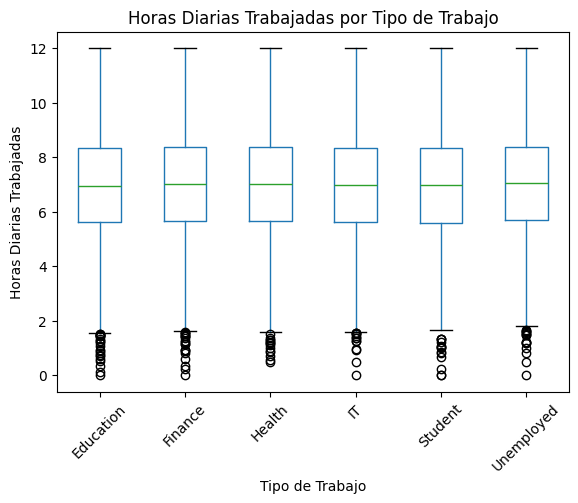

In [85]:
plt.figure(figsize=(12,6))
df.boxplot(column="Horas_Diarias_Trabajadas", by="Tipo_Trabajo", grid=False)

plt.title("Horas Diarias Trabajadas por Tipo de Trabajo")
plt.suptitle("")
plt.xlabel("Tipo de Trabajo")
plt.ylabel("Horas Diarias Trabajadas")
plt.xticks(rotation=45)
plt.show()

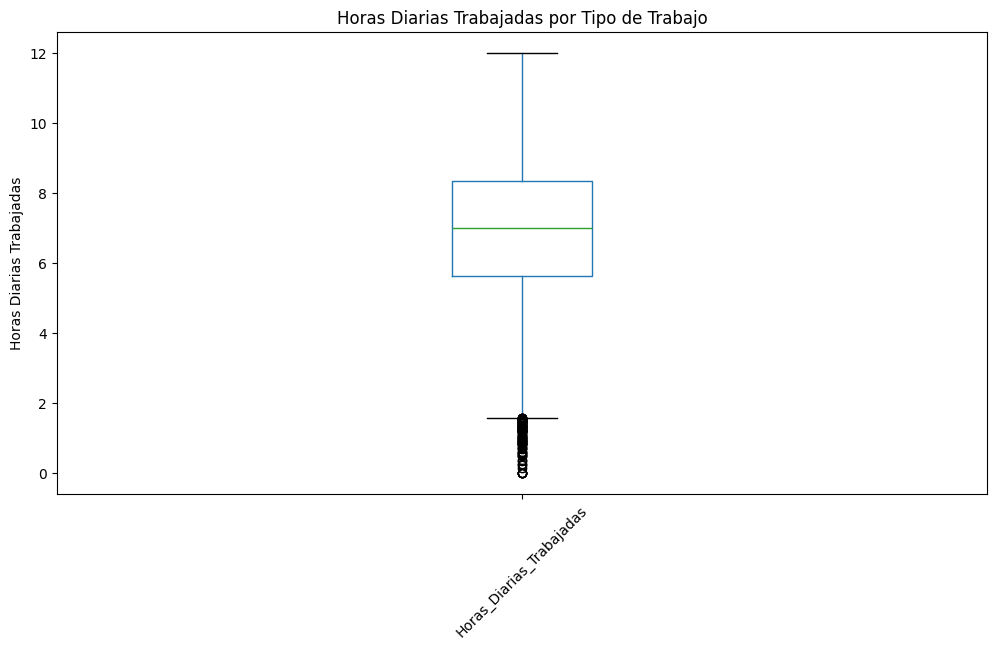

In [86]:
plt.figure(figsize=(12,6))
df.boxplot(column="Horas_Diarias_Trabajadas", grid=False)
plt.title("Horas Diarias Trabajadas por Tipo de Trabajo")
plt.suptitle("")
plt.ylabel("Horas Diarias Trabajadas")
plt.xticks(rotation=45)
plt.show()

In [151]:
# Reemplazar valores menores a 1.575 en Horas_Diarias_Trabajados con 6.99, todos los valores por debajo de este limite son outliers innecesarios
df.loc[df['Horas_Diarias_Trabajadas'] < 1.575, 'Horas_Diarias_Trabajadas'] = 6.99

In [87]:

Q1 = df["Horas_Diarias_Trabajadas"].quantile(0.25)
Q3 = df["Horas_Diarias_Trabajadas"].quantile(0.75)
IQR = Q3 - Q1


limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR


outliers = df[(df["Horas_Diarias_Trabajadas"] < limite_inferior) |
              (df["Horas_Diarias_Trabajadas"] > limite_superior)]


print("Cantidad de outliers:", len(outliers))

print(limite_inferior)



Cantidad de outliers: 95
1.5750000000000002


REGRESIÓN LINEAL QUE SE UTILIZARA PARA IMPUTAR COLUMNAS RELACIONADAS

Pendiente: 0.783436167158518
Intercepto: 1.0669096038794188
y = 0.7834 * x + 1.0669


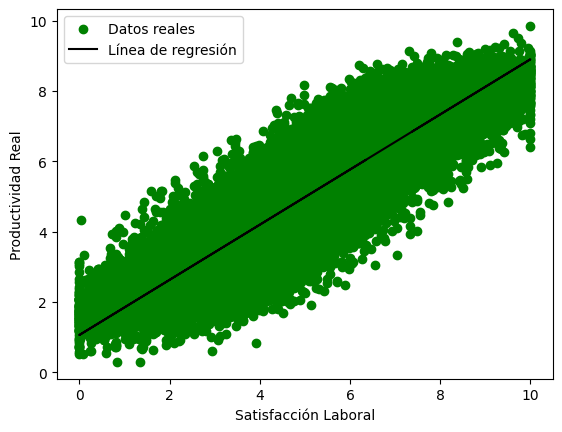

In [89]:
df_limpio = df.dropna(subset=["Puntuacion_De_Satisfaccion_Laboral", "Puntuacion_Productividad_Real"])

X = df_limpio[["Puntuacion_De_Satisfaccion_Laboral"]]
y = df_limpio["Puntuacion_Productividad_Real"]

modelo = LinearRegression()
modelo.fit(X, y)

print("Pendiente:", modelo.coef_[0])
print("Intercepto:", modelo.intercept_)

m = modelo.coef_[0]
b = modelo.intercept_
print(f"y = {m:.4f} * x + {b:.4f}")


plt.scatter(X, y, color="green", label="Datos reales")
plt.plot(X, modelo.predict(X), color="black", label="Línea de regresión")
plt.xlabel("Satisfacción Laboral")
plt.ylabel("Productividad Real")
plt.legend()
plt.show()



IMPUTACIONES

In [150]:
df['Puntuacion_Productividad_Autoevaluada'] = df['Puntuacion_Productividad_Autoevaluada'].fillna(df["Puntuacion_Productividad_Real"] + 0.55)

df['Puntuacion_Productividad_Real'] = df['Puntuacion_Productividad_Real'].fillna(df["Puntuacion_Productividad_Autoevaluada"] - 0.55)

df['Puntuacion_Productividad_Real'] = df['Puntuacion_Productividad_Real'].fillna(0.7834316671585180 * df['Puntuacion_De_Satisfaccion_Laboral'] + 1.066996038794188)

df['Puntuacion_De_Satisfaccion_Laboral'] = df['Puntuacion_De_Satisfaccion_Laboral'].fillna((df['Puntuacion_Productividad_Real'] - 1.066996038794188) / 0.7834316671585180)


# Diccionario con las medias calculadas
medias = {
    'Hora_Diaria_En_Redes': 3.113415,
    'Nivel_Estres': 5.513801,
    'Horas_De_Sueño': 6.500254,
    'Uso_Antes_De_Dormir': 1.025561,
    'Puntuacion_De_Satisfaccion_Laboral':4.96,
    'Puntuacion_Productividad_Autoevaluada':5.51,
    'Puntuacion_Productividad_Real':4.95,
}

# Imputar los valores nulos con sus promedios
for col, mean_val in medias.items():
    df[col] = df[col].fillna(mean_val)
r= df.isnull().sum()

print(r)

Edad                                     0
Genero                                   0
Tipo_Trabajo                             0
Hora_Diaria_En_Redes                     0
Red_Social_Favorita                      0
Notificaciones_Diarias                   0
Horas_Diarias_Trabajadas                 0
Puntuacion_Productividad_Autoevaluada    0
Puntuacion_Productividad_Real            0
Nivel_Estres                             0
Horas_De_Sueño                           0
Uso_Antes_De_Dormir                      0
Breaks_En_El_Trabajo                     0
Uso_De_Apps_De_Enfoque                   0
Estado_De_BienestarDigital_Activo        0
Tazas_De_Cafe_Por_Dia                    0
Dias_Del_Mes_Con_Burnout                 0
Horas_Semanales_Fuera_De_Linea           0
Puntuacion_De_Satisfaccion_Laboral       0
dtype: int64
